In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter 
from mpl_toolkits import mplot3d
from scipy import stats
import statistics as st
import pingouin  as pg
df=pd.read_csv("C://Users/83453/Desktop/1624 assignment/clean_kaggle_data.csv")

D:\anacoda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (207) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


  # cells below are used to explore some main characteristics and trend of the dataset (Q1)

<Figure size 864x1296 with 0 Axes>

<Figure size 432x288 with 0 Axes>

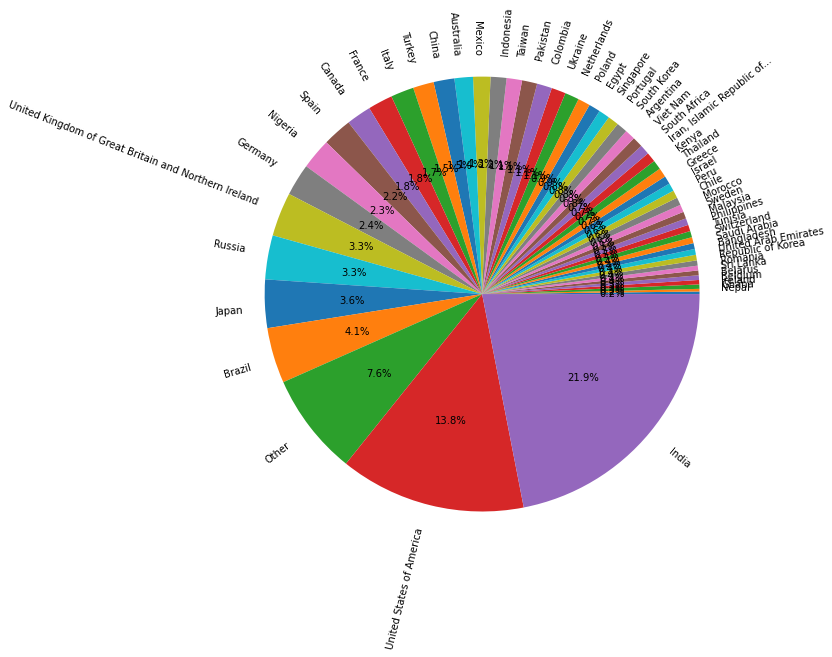

In [2]:
#data scientists geographic distribution by countries
country_num=Counter(df['Q3'])
dic_country={'country name':country_num.keys(),'num':country_num.values()}
df_country_num=pd.DataFrame(dic_country)
fig=plt.figure(figsize=(12,18))
df_country_num.sort_values('num',inplace=True)
plt.figure()
fig=plt.figure(figsize=(10,10))
plt.pie(df_country_num['num'],labels=df_country_num['country name'],rotatelabels=True,autopct="%.1f%%")
plt.show()

<BarContainer object of 11 artists>

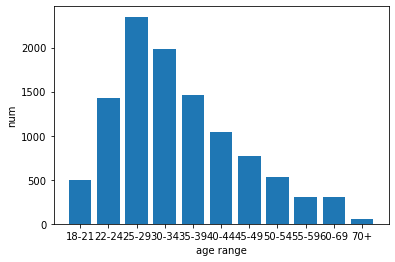

In [3]:
#age distribution
age=Counter(df['Q1'])
dic_age={'age range':age.keys(),'num':age.values()}
df_age=pd.DataFrame(dic_age)
df_age.sort_values('age range',inplace=True)
plt.xlabel('age range')
plt.ylabel('num')
plt.bar(df_age['age range'],df_age['num'])

<BarContainer object of 7 artists>

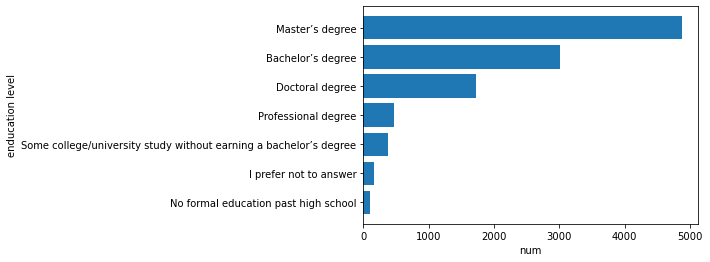

In [4]:
#education distribution
edu=Counter(df['Q4'])
dic_edu={'education level':edu.keys(),'num':edu.values()}
df_edu=pd.DataFrame(dic_edu)
df_edu.sort_values('num',inplace=True)
plt.xlabel('num')
plt.ylabel('enducation level')
plt.barh(df_edu['education level'],df_edu['num'])

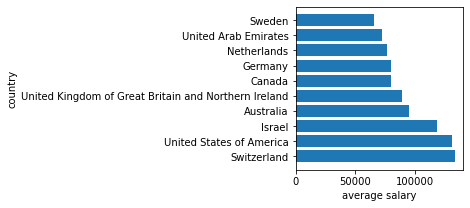

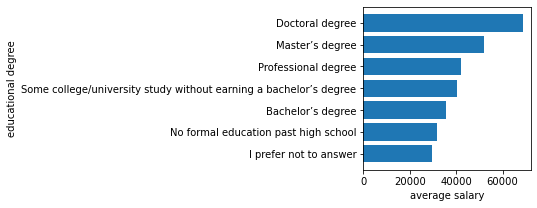

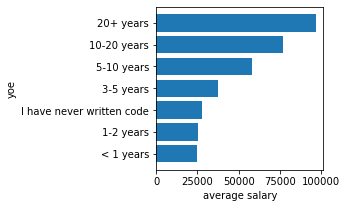

In [5]:
#salary in different countries
sc=df[['Q3','Q24']] #sc is short for salary_country
sc_mean=sc.groupby(['Q3']).mean().reset_index()
sc_mean.sort_values('Q24',inplace=True,ascending=False)
fig=plt.figure(figsize=(3,3))
plt.xlabel('average salary')
plt.ylabel('country')
plt.barh(sc_mean['Q3'][0:10],sc_mean['Q24'][0:10])
plt.show()
#salary in different educational degree group
se=df[['Q4','Q24']]#se is short for salary_education
se_mean=se.groupby(['Q4']).mean().reset_index()
se_mean.sort_values('Q24',inplace=True)
fig=plt.figure(figsize=(3,3))
plt.xlabel('average salary')
plt.ylabel('educational degree')
plt.barh(se_mean['Q4'],se_mean['Q24'])
plt.show()
#salary in different yoe(year of experience) group
sy=df[['Q6','Q24']]#sy is short for salary_yoe
sy_mean=sy.groupby(['Q6']).mean().reset_index()
sy_mean.sort_values('Q24',inplace=True)
fig=plt.figure(figsize=(3,3))
plt.xlabel('average salary')
plt.ylabel('yoe')
plt.barh(sy_mean['Q6'],sy_mean['Q24'])
plt.show()

# Explore the difference between average salary of man and woman(Q2)

mean of man salary:$ 50750.61992786294
mean of woman salary:$ 36417.11229946524
standard deviation of man salary:$ 70344.01009325527
standard deviation of woman salary:$ 59425.05371474224
median of man salary:$ 25000.0
median of woman salary:$ 7500
mode of man salary:$ ModeResult(mode=array([1000], dtype=int64), count=array([1606]))
mode of woman salary:$ ModeResult(mode=array([1000], dtype=int64), count=array([485]))
variance of man salary:$ 4948837560
variance of woman salary:$ 3533436496


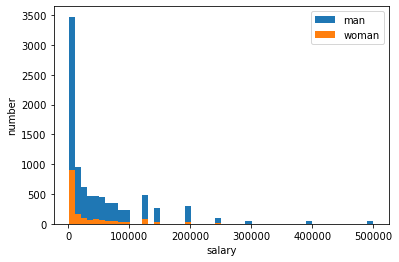

In [6]:
#explore statistics and distribution of man and woman salary
man_salary=df.loc[df['Q2']=='Man']['Q24'].values[:]
woman_salary=df.loc[df['Q2']=='Woman']['Q24'].values[:]
print('mean of man salary:$',man_salary.mean())
print('mean of woman salary:$',woman_salary.mean())
print('standard deviation of man salary:$',st.pstdev(man_salary))
print('standard deviation of woman salary:$',st.pstdev(woman_salary))
print('median of man salary:$',st.median(man_salary))
print('median of woman salary:$',st.median(woman_salary))
print('mode of man salary:$',stats.mode(man_salary))
print('mode of woman salary:$',stats.mode(woman_salary))
print('variance of man salary:$',st.variance(man_salary))
print('variance of woman salary:$',st.variance(woman_salary))
plt.figure()
plt.xlabel('salary')
plt.ylabel('number')
plt.hist(man_salary,bins=50,label='man')
plt.hist(woman_salary,bins=50,label='woman')
plt.legend()

bootstrapping the data

variance of man bootstrap:$ 587723
variance of woman bootstrap:$ 2150368
p-value of levene test: 8.331500879428763e-66


Ttest_indResult(statistic=274.6203564302056, pvalue=0.0)

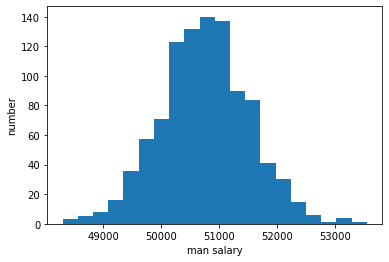

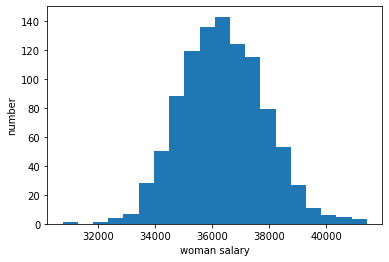

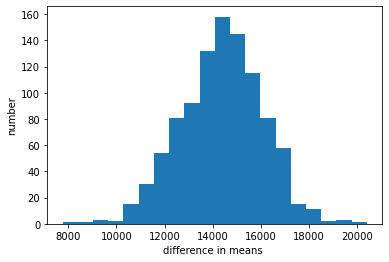

In [7]:
#bootstrapping the man and woman salary
boot_distrubution_man=[]
np.random.seed(1)
for i in range(1000):
    sample=np.random.choice(man_salary,size=len(man_salary))
    sample_mean=st.mean(sample)
    sample_median=st.median(sample)
    boot_distrubution_man.append(sample_mean)
plt.figure()
plt.xlabel('man salary')
plt.ylabel('number')
plt.hist(boot_distrubution_man,bins=20)


boot_distrubution_woman=[]
for i in range(1000):
    sample=np.random.choice(woman_salary,size=len(woman_salary))
    sample_mean=st.mean(sample)
    sample_median=st.median(sample)
    boot_distrubution_woman.append(sample_mean)
plt.figure()
plt.xlabel('woman salary')
plt.ylabel('number')
plt.hist(boot_distrubution_woman,bins=20)

dif_mean=[]

for i in range(1000):
    dif_mean.append(boot_distrubution_man[i]-boot_distrubution_woman[i])
plt.figure()
plt.xlabel('difference in means ')
plt.ylabel('number')
plt.hist(dif_mean,bins=20)

print('variance of man bootstrap:$',st.variance(boot_distrubution_man))
print('variance of woman bootstrap:$',st.variance(boot_distrubution_woman))
s1,p1=stats.levene(boot_distrubution_man,boot_distrubution_woman)#levene test
print('p-value of levene test:',p1)
stats.ttest_ind(boot_distrubution_man,boot_distrubution_woman,equal_var=False)#welch t-test

# Explore the difference of mean salary in different education group(Q3)

mean of bachelor's,master's,doctor's salary: 35732 52120 68719
median of bachelor's,master's,doctor's salary: 10000 25000 40000.0
standard deviation of bachelor's,master's,doctor's salary: 60247.75354318201 67681.57152430786 85403.6503903668
mode of bachelor's,master's,doctor's salary: ModeResult(mode=array([1000], dtype=int64), count=array([781])) ModeResult(mode=array([1000], dtype=int64), count=array([830])) ModeResult(mode=array([1000], dtype=int64), count=array([224]))
variance of bachelor's,master's,doctor's salary: 3629791807 4580795124 7293783500


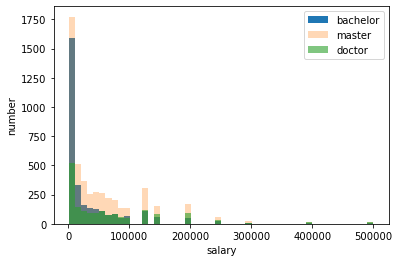

In [8]:
#explore statistics and distribution of salary in different education group
bachelor_salary=df.loc[df['Q4']=="Bachelor’s degree"]['Q24'].values[:]
master_salary=df.loc[df['Q4']=="Master’s degree"]['Q24'].values[:]
doctor_salary=df.loc[df['Q4']=="Doctoral degree"]['Q24'].values[:]
plt.figure()
plt.xlabel('salary')
plt.ylabel('number')
plt.hist(bachelor_salary,bins=50,alpha=1,label='bachelor')
plt.hist(master_salary,bins=50,alpha=0.3,label='master')
plt.hist(doctor_salary,bins=50,alpha=0.6,label='doctor')
plt.legend()
print("mean of bachelor's,master's,doctor's salary:",
      st.mean(bachelor_salary),st.mean(master_salary),st.mean(doctor_salary))
print("median of bachelor's,master's,doctor's salary:",
      st.median(bachelor_salary),st.median(master_salary),st.median(doctor_salary))
print("standard deviation of bachelor's,master's,doctor's salary:",
      st.stdev(bachelor_salary),st.stdev(master_salary),st.stdev(doctor_salary))
print("mode of bachelor's,master's,doctor's salary:",
      stats.mode(bachelor_salary),stats.mode(master_salary),stats.mode(doctor_salary))
print("variance of bachelor's,master's,doctor's salary:",
      st.variance(bachelor_salary),st.variance(master_salary),st.variance(doctor_salary))

bootstrapping the data

(array([  1.,   0.,   1.,   1.,   6.,  13.,  37.,  62., 101., 126., 152.,
        160., 115.,  91.,  64.,  36.,  18.,   9.,   4.,   3.]),
 array([23082.  , 23981.15, 24880.3 , 25779.45, 26678.6 , 27577.75,
        28476.9 , 29376.05, 30275.2 , 31174.35, 32073.5 , 32972.65,
        33871.8 , 34770.95, 35670.1 , 36569.25, 37468.4 , 38367.55,
        39266.7 , 40165.85, 41065.  ]),
 <BarContainer object of 20 artists>)

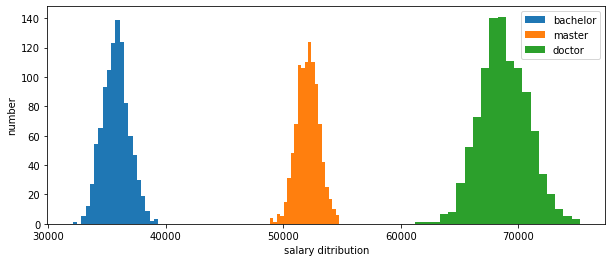

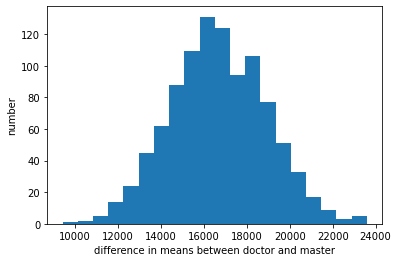

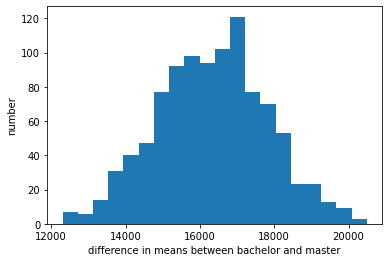

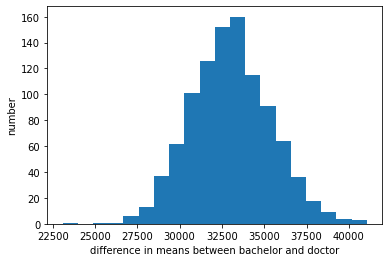

In [9]:
#bootstrapping salary and educational group data
np.random.seed(1)
boot_distrubution_bachelor=[]
for i in range(1000):
    sample=np.random.choice(bachelor_salary,size=len(bachelor_salary))
    sample_mean=st.mean(sample)
    boot_distrubution_bachelor.append(sample_mean)
plt.figure(figsize=(10,4))
plt.xlabel('salary ditribution')
plt.ylabel('number')
plt.hist(boot_distrubution_bachelor,bins=20,label='bachelor')

boot_distrubution_master=[]
for i in range(1000):
    sample=np.random.choice(master_salary,size=len(master_salary))
    sample_mean=st.mean(sample)
    boot_distrubution_master.append(sample_mean)

plt.hist(boot_distrubution_master,bins=20,label='master')

boot_distrubution_doctor=[]
for i in range(1000):
    sample=np.random.choice(doctor_salary,size=len(doctor_salary))
    sample_mean=st.mean(sample)
    boot_distrubution_doctor.append(sample_mean)

plt.hist(boot_distrubution_doctor,bins=20,label='doctor')
plt.legend()

dif_mean1=[]
for i in range(1000):
    dif_mean1.append(boot_distrubution_doctor[i]-boot_distrubution_master[i])
plt.figure()
plt.xlabel('difference in means between doctor and master')
plt.ylabel('number')
plt.hist(dif_mean1,bins=20)
dif_mean2=[]
for i in range(1000):
    dif_mean2.append(boot_distrubution_master[i]-boot_distrubution_bachelor[i])
plt.figure()
plt.xlabel('difference in means between bachelor and master')
plt.ylabel('number')
plt.hist(dif_mean2,bins=20)
dif_mean3=[]
for i in range(1000):
    dif_mean3.append(boot_distrubution_doctor[i]-boot_distrubution_bachelor[i])
plt.figure()
plt.xlabel('difference in means between bachelor and doctor')
plt.ylabel('number')
plt.hist(dif_mean3,bins=20)

In [10]:
print('variance of bachelor bootstrap:$',st.variance(boot_distrubution_bachelor))
print('variance of master bootstrap:$',st.variance(boot_distrubution_master))
print('variance of doctor bootstrap:$',st.variance(boot_distrubution_doctor))
s2,p2=stats.levene(boot_distrubution_bachelor,boot_distrubution_master,boot_distrubution_doctor)#levene test
print('p-value of levene test:',p2)
all_degree_salary=boot_distrubution_bachelor+boot_distrubution_master+boot_distrubution_doctor
df_boot=pd.DataFrame({'salary':all_degree_salary,'degree name':np.repeat(['boot_distrubution_bachelor','boot_distrubution_master','boot_distrubution_doctor'],repeats=1000)})
pg.welch_anova(data=df_boot,dv='salary',between='degree name')#welch anova 

variance of bachelor bootstrap:$ 1258851
variance of master bootstrap:$ 929733
variance of doctor bootstrap:$ 4160762
p-value of levene test: 7.502994447218006e-111


,Source,ddof1,ddof2,F,p-unc,np2
0,degree name,2,1883.42456,120260.921533,0.0,0.988491
